# Run scripts in cmd
and keep history


In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

In [2]:
import os

In [3]:
pwd=!cd ../ && echo ${PWD}/
os.environ['DATA_DIR'] = pwd[0] + "input"

In [4]:
Detectron = "../detectron_source/"

In [5]:
def get_gt_bboxes_labels(image_id, annotations):
    selected_annotations = [a for a in gt_annotations if a['image_id'] == image_id]
    if len(selected_annotations) == 0:
        return []
    
    bboxes_labels = [(a['bbox'], str(a['category_id'])) for a in selected_annotations]
    return bboxes_labels

In [6]:
# !pip install --upgrade image-dataset-viz
from image_dataset_viz import render_datapoint, bbox_to_points, xywh_to_xyxy

In [7]:
def get_img_gt_target(img_path, image_id, annotations):
    img = Image.open(img_path + image_id + ".jpg")
    targets = [(bbox_to_points(xywh_to_xyxy(b)), l) for b, l in get_gt_bboxes_labels(image_id, gt_annotations)]
    return render_datapoint(img, targets, output_size=(430, 430))

## Check model overfitting on a few images

Display images

In [8]:
!ls ${DATA_DIR}/as_mscoco/train_overfit

000026e7ee790996.jpg  0002ab0af02e4a77.jpg  00045d609ca3f4eb.jpg
000062a39995e348.jpg  0002cc8afaf1b611.jpg  00068d5450f0358b.jpg
0000c64e1253d68f.jpg  0003d84e0165d630.jpg
000132c20b84269b.jpg  000411001ff7dd4f.jpg


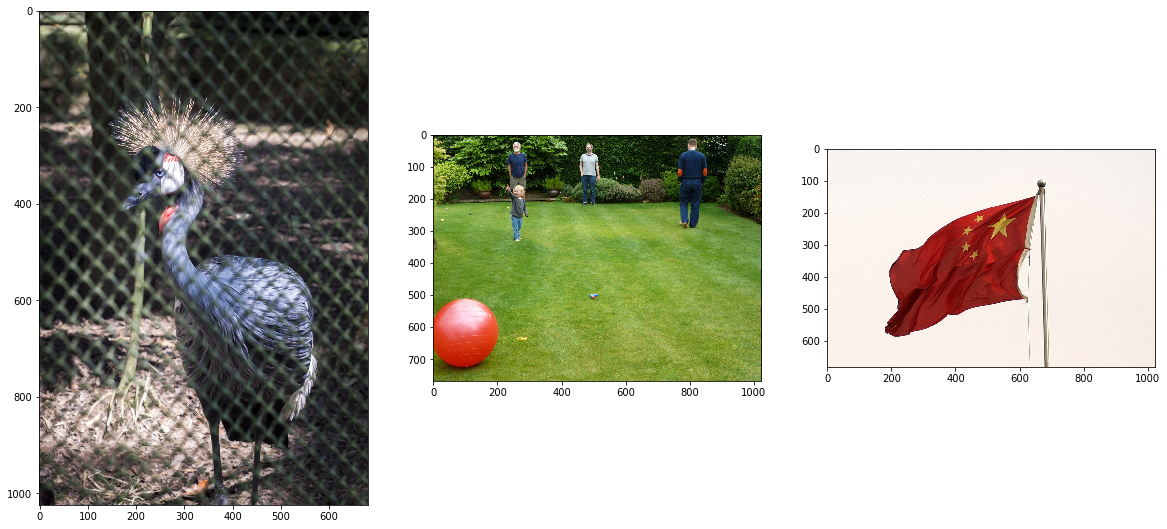

In [9]:
from PIL import Image
import matplotlib.pylab as plt
%matplotlib inline

path = os.environ['DATA_DIR'] + "/as_mscoco/train_overfit/"

plt.figure(figsize=(20, 20))
plt.subplot(131)
plt.imshow(Image.open(path + "000062a39995e348.jpg"))

plt.subplot(132)
plt.imshow(Image.open(path + "0003d84e0165d630.jpg"))

plt.subplot(133)
plt.imshow(Image.open(path + "00068d5450f0358b.jpg"))

In [10]:
import json

gt_annotations = None
path = os.environ['DATA_DIR'] + "/as_mscoco/annotations/"

with open(path + "train_overfit.json", "r") as h:
    data = json.load(h)
    gt_annotations = data['annotations']

### Check 10 images overfitting - Faster-RCNN X

In [11]:
from datetime import datetime
now = datetime.now()

config_name = "check_faster_rcnn_X-101-64x4d-FPN_1x"
output_path = "/home/data/output-OpenImagesObjectDetections/{}/{}".format(config_name, now.strftime("%Y%m%d_%H%M"))
weights_path = "weights/Faster-RCNN-X-101-64x4d-FPN/model_final.pkl" 

config = "configs/open_images_v4/{}.yaml".format(config_name)
other_confs = "NUM_GPUS 1 " + \
                "OUTPUT_DIR {} ".format(output_path) + \
                "TRAIN.WEIGHTS {} ".format(weights_path) + \
                "TRAIN.IMS_PER_BATCH 1 " + \
                "TRAIN.SNAPSHOT_ITERS 1000 " + \
                "SOLVER.MAX_ITER 2000 " + \
                "SOLVER.BASE_LR 0.0085 " + \
                "SOLVER.WARM_UP_ITERS 10 " + \
                "DATA_LOADER.MINIBATCH_QUEUE_SIZE 10 " + \
                "DATA_LOADER.BLOBS_QUEUE_CAPACITY 8 " + \
                "DATA_LOADER.NUM_THREADS 4"

                
!mkdir -p {output_path}
!echo "python2 tools/train_net.py --cfg {config} {other_confs}" > {output_path}/run.cmd
!python2 {Detectron}/tools/train_net.py --cfg {config} {other_confs}

/usr/local/lib/python2.7/dist-packages/scipy/sparse/lil.py:16: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from . import _csparsetools
/usr/local/lib/python2.7/dist-packages/scipy/sparse/csgraph/__init__.py:167: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._shortest_path import shortest_path, floyd_warshall, dijkstra,\
/usr/local/lib/python2.7/dist-packages/scipy/sparse/csgraph/_validation.py:5: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._tools import csgraph_to_dense, csgraph_from_dense,\
/usr/local/lib/python2.7/dist-packages/scipy/sparse/csgraph/__init__.py:169: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._traversal import breadth_first_order, depth_first_order, \
/usr/local/lib/python2.7/dist-packages/scipy/sparse/csgraph/__init__.py:171: R

Run inference on train_overfitting dataset

In [40]:
inference_output_path = "{}/inference_on_train/".format(output_path)
other_confs = "--output-dir {} --image-ext jpg --output-ext png".format(inference_output_path)
input_path = os.environ['DATA_DIR'] + "/as_mscoco/train_overfit/"
weights_path = output_path + "/train/open_images_v4_train_overfit/generalized_rcnn/model_final.pkl"

!mkdir -p {inference_output_path}
!python2 {Detectron}/tools/infer_simple.py --cfg {config} {other_confs} --wts {weights_path} {input_path}

Found Detectron ops lib: /usr/local/caffe2_build/lib/libcaffe2_detectron_ops_gpu.so
E0727 06:11:56.368219 10885 init_intrinsics_check.cc:54] CPU feature avx is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
E0727 06:11:56.368237 10885 init_intrinsics_check.cc:54] CPU feature avx2 is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
E0727 06:11:56.368255 10885 init_intrinsics_check.cc:54] CPU feature fma is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
WARNING cnn.py:  40: [====DEPRECATE WARNING====]: you are creating an object from CNNModelHelper class which will be deprecated soon. Please use ModelHelper object with brew module. For more information, please refer to caffe2.ai and python/brew.py, python/brew_test.py for more information.
INFO net.py:  59: Lo

In [41]:
!ls {inference_output_path}

000026e7ee790996.jpg.png  0002ab0af02e4a77.jpg.png  00045d609ca3f4eb.jpg.png
000062a39995e348.jpg.png  0002cc8afaf1b611.jpg.png  00068d5450f0358b.jpg.png
0000c64e1253d68f.jpg.png  0003d84e0165d630.jpg.png
000132c20b84269b.jpg.png  000411001ff7dd4f.jpg.png


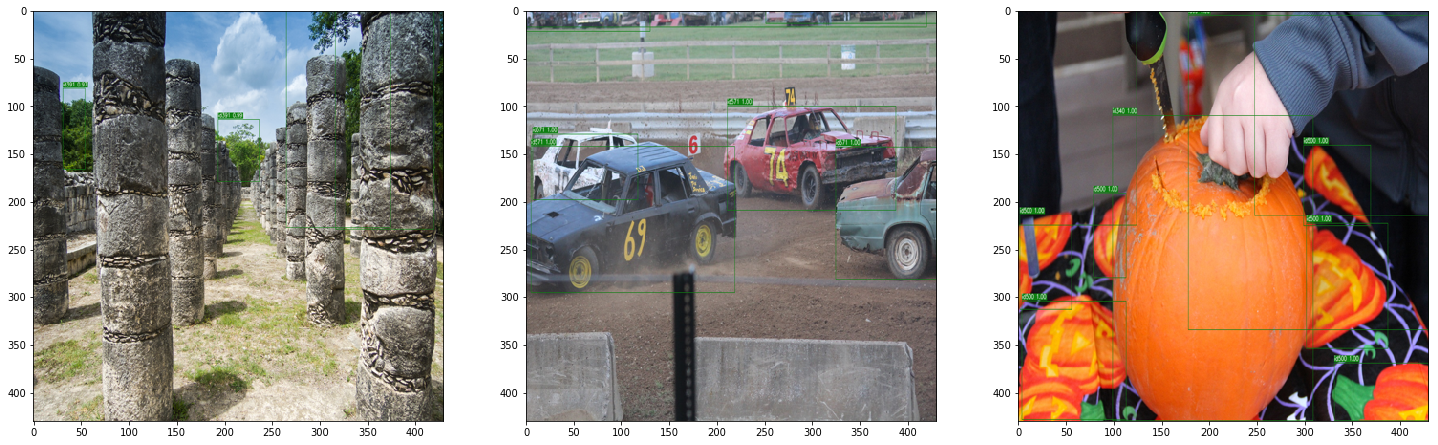

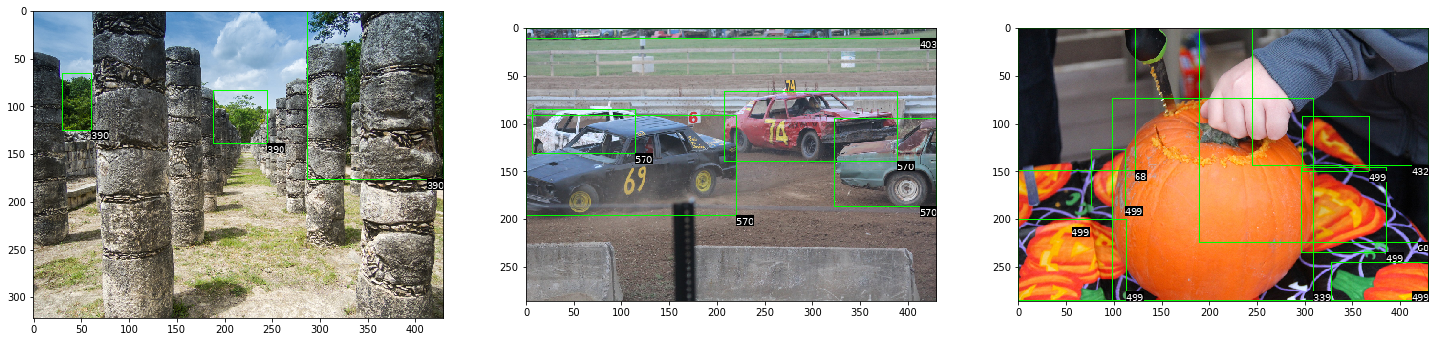

In [42]:
from PIL import Image
import matplotlib.pylab as plt
%matplotlib inline


plt.figure(figsize=(25, 10))
plt.subplot(131)
plt.imshow(Image.open(inference_output_path + "000026e7ee790996.jpg.png").resize((430, 430), Image.BICUBIC))

plt.subplot(132)
plt.imshow(Image.open(inference_output_path + "0000c64e1253d68f.jpg.png").resize((430, 430), Image.BICUBIC))

plt.subplot(133)
plt.imshow(Image.open(inference_output_path + "00045d609ca3f4eb.jpg.png").resize((430, 430), Image.BICUBIC))


img_path = os.environ['DATA_DIR'] + "/as_mscoco/train_overfit/"
plt.figure(figsize=(25, 10))
plt.subplot(131)
plt.imshow(get_img_gt_target(img_path, "000026e7ee790996", gt_annotations))

plt.subplot(132)
plt.imshow(get_img_gt_target(img_path, "0000c64e1253d68f", gt_annotations))

plt.subplot(133)
plt.imshow(get_img_gt_target(img_path, "00045d609ca3f4eb", gt_annotations))


## Train models

Training dataset contains: 162894 images

In [44]:
!find /home/fast_storage/OpenImagesDataset/as_mscoco/val/ -name *.jpg | wc -l
!find /home/fast_storage/OpenImagesDataset/as_mscoco/test/ -name *.jpg | wc -l

41620
125436


In [46]:
( 41620 * 0.9 + 125436 ) * 200 / 2

16289400.0

## Run training - Finetunning of Faster-RCNN

In [8]:
from datetime import datetime
now = datetime.now()


config_name = "faster_rcnn_X-101-64x4d-FPN_1x"
output_path = "/home/storage_ntfs_1tb/output-OpenImagesObjectDetections/{}/{}".format(config_name, now.strftime("%Y%m%d_%H%M"))
weights_path = "weights/Faster-RCNN-X-101-64x4d-FPN/model_final.pkl" 

config = "configs/open_images_v4/{}.yaml".format(config_name)
other_confs = "NUM_GPUS 1 " + \
                "OUTPUT_DIR {} ".format(output_path) + \
                "TRAIN.WEIGHTS {} ".format(weights_path) + \
                "TRAIN.SNAPSHOT_ITERS 20000 " + \
                "TRAIN.IMS_PER_BATCH 1 " + \
                "SOLVER.BASE_LR 0.001 " + \
                "SOLVER.GAMMA 0.5 " + \
                "SOLVER.WARM_UP_ITERS 100 " + \
                "DATA_LOADER.MINIBATCH_QUEUE_SIZE 64 " + \
                "DATA_LOADER.BLOBS_QUEUE_CAPACITY 16 " + \
                "DATA_LOADER.NUM_THREADS 4"


print("Output dir: ", output_path)                
!mkdir -p {output_path}
!echo "python2 tools/train_net.py --cfg {config} {other_confs}" > {output_path}/run.cmd
!python2 {Detectron}/tools/train_net.py --cfg {config} {other_confs}

('Output dir: ', '/home/storage_ntfs_1tb/output-OpenImagesObjectDetections/faster_rcnn_X-101-64x4d-FPN_1x/20180728_0006')
Found Detectron ops lib: /usr/local/caffe2_build/lib/libcaffe2_detectron_ops_gpu.so
E0728 00:06:04.243274 15364 init_intrinsics_check.cc:54] CPU feature avx is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
E0728 00:06:04.243732 15364 init_intrinsics_check.cc:54] CPU feature avx2 is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
E0728 00:06:04.243741 15364 init_intrinsics_check.cc:54] CPU feature fma is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
INFO train_net.py:  95: Called with args:
INFO train_net.py:  96: Namespace(cfg_file='configs/open_images_v4/faster_rcnn_X-101-64x4d-FPN_1x.yaml', multi_gpu_testing=False, opts=['NUM_GPUS', 

WARNING memonger.py:  70: NOTE: Executing memonger to optimize gradient memory
INFO memonger.py: 112: Memonger memory optimization took 0.00454902648926 secs
INFO train.py: 200: Loading dataset: ('open_images_v4_train_small', 'open_images_v4_val_0.9')
loading annotations into memory...
Done (t=6.16s)
creating index...
index created!
INFO roidb.py:  49: Appending horizontally-flipped training examples...
INFO roidb.py:  51: Loaded dataset: open_images_v4_train_small
loading annotations into memory...
Done (t=3.35s)
creating index...
index created!
INFO roidb.py:  49: Appending horizontally-flipped training examples...
INFO roidb.py:  51: Loaded dataset: open_images_v4_val_0.9
INFO roidb.py: 135: Filtered 0 roidb entries: 280548 -> 280548
INFO roidb.py:  67: Computing bounding-box regression targets...
INFO roidb.py:  69: done
INFO train.py: 204: 280548 roidb entries
INFO net.py:  59: Loading weights from: weights/Faster-RCNN-X-101-64x4d-FPN/model_final.pkl
INFO train.py: 188: Outputs sa

INFO net.py: 257: res3_0_branch2b             : (1, 512, 100, 128)   => res3_0_branch2b             : (1, 512, 100, 128)   ------- (op: AffineChannel)
INFO net.py: 257: res3_0_branch2b             : (1, 512, 100, 128)   => res3_0_branch2b             : (1, 512, 100, 128)   ------- (op: Relu)
INFO net.py: 257: res3_0_branch2b             : (1, 512, 100, 128)   => res3_0_branch2c             : (1, 512, 100, 128)   ------- (op: Conv)
INFO net.py: 257: res3_0_branch2c             : (1, 512, 100, 128)   => res3_0_branch2c_bn          : (1, 512, 100, 128)   ------- (op: AffineChannel)
INFO net.py: 257: res2_2_sum                  : (1, 256, 200, 256)   => res3_0_branch1              : (1, 512, 100, 128)   ------- (op: Conv)
INFO net.py: 257: res3_0_branch1              : (1, 512, 100, 128)   => res3_0_branch1_bn           : (1, 512, 100, 128)   ------- (op: AffineChannel)
INFO net.py: 257: res3_0_branch2c_bn          : (1, 512, 100, 128)   => res3_0_branch2c_bn          : (1, 512, 100, 128) 

INFO net.py: 257: res4_1_branch2c_bn          : (1, 1024, 50, 64)    => res4_2_branch2a             : (1, 1024, 50, 64)    ------- (op: Conv)
INFO net.py: 257: res4_2_branch2a             : (1, 1024, 50, 64)    => res4_2_branch2a             : (1, 1024, 50, 64)    ------- (op: AffineChannel)
INFO net.py: 257: res4_2_branch2a             : (1, 1024, 50, 64)    => res4_2_branch2a             : (1, 1024, 50, 64)    ------- (op: Relu)
INFO net.py: 257: res4_2_branch2a             : (1, 1024, 50, 64)    => res4_2_branch2b             : (1, 1024, 50, 64)    ------- (op: Conv)
INFO net.py: 257: res4_2_branch2b             : (1, 1024, 50, 64)    => res4_2_branch2b             : (1, 1024, 50, 64)    ------- (op: AffineChannel)
INFO net.py: 257: res4_2_branch2b             : (1, 1024, 50, 64)    => res4_2_branch2b             : (1, 1024, 50, 64)    ------- (op: Relu)
INFO net.py: 257: res4_2_branch2b             : (1, 1024, 50, 64)    => res4_2_branch2c             : (1, 1024, 50, 64)    -------

INFO net.py: 257: res4_7_branch2c_bn          : (1, 1024, 50, 64)    => res4_7_branch2c_bn          : (1, 1024, 50, 64)    ------- (op: Sum)
INFO net.py: 257: res4_6_branch2c_bn          : (1, 1024, 50, 64)    => res4_7_branch2c_bn          : (1, 1024, 50, 64)    ------|
INFO net.py: 257: res4_7_branch2c_bn          : (1, 1024, 50, 64)    => res4_7_branch2c_bn          : (1, 1024, 50, 64)    ------- (op: Relu)
INFO net.py: 257: res4_7_branch2c_bn          : (1, 1024, 50, 64)    => res4_8_branch2a             : (1, 1024, 50, 64)    ------- (op: Conv)
INFO net.py: 257: res4_8_branch2a             : (1, 1024, 50, 64)    => res4_8_branch2a             : (1, 1024, 50, 64)    ------- (op: AffineChannel)
INFO net.py: 257: res4_8_branch2a             : (1, 1024, 50, 64)    => res4_8_branch2a             : (1, 1024, 50, 64)    ------- (op: Relu)
INFO net.py: 257: res4_8_branch2a             : (1, 1024, 50, 64)    => res4_8_branch2b             : (1, 1024, 50, 64)    ------- (op: Conv)
INFO net.

INFO net.py: 257: res4_13_branch2b            : (1, 1024, 50, 64)    => res4_13_branch2b            : (1, 1024, 50, 64)    ------- (op: Relu)
INFO net.py: 257: res4_13_branch2b            : (1, 1024, 50, 64)    => res4_13_branch2c            : (1, 1024, 50, 64)    ------- (op: Conv)
INFO net.py: 257: res4_13_branch2c            : (1, 1024, 50, 64)    => res4_13_branch2c_bn         : (1, 1024, 50, 64)    ------- (op: AffineChannel)
INFO net.py: 257: res4_13_branch2c_bn         : (1, 1024, 50, 64)    => res4_13_branch2c_bn         : (1, 1024, 50, 64)    ------- (op: Sum)
INFO net.py: 257: res4_12_branch2c_bn         : (1, 1024, 50, 64)    => res4_13_branch2c_bn         : (1, 1024, 50, 64)    ------|
INFO net.py: 257: res4_13_branch2c_bn         : (1, 1024, 50, 64)    => res4_13_branch2c_bn         : (1, 1024, 50, 64)    ------- (op: Relu)
INFO net.py: 257: res4_13_branch2c_bn         : (1, 1024, 50, 64)    => res4_14_branch2a            : (1, 1024, 50, 64)    ------- (op: Conv)
INFO net.

INFO net.py: 257: res4_19_branch2a            : (1, 1024, 50, 64)    => res4_19_branch2a            : (1, 1024, 50, 64)    ------- (op: AffineChannel)
INFO net.py: 257: res4_19_branch2a            : (1, 1024, 50, 64)    => res4_19_branch2a            : (1, 1024, 50, 64)    ------- (op: Relu)
INFO net.py: 257: res4_19_branch2a            : (1, 1024, 50, 64)    => res4_19_branch2b            : (1, 1024, 50, 64)    ------- (op: Conv)
INFO net.py: 257: res4_19_branch2b            : (1, 1024, 50, 64)    => res4_19_branch2b            : (1, 1024, 50, 64)    ------- (op: AffineChannel)
INFO net.py: 257: res4_19_branch2b            : (1, 1024, 50, 64)    => res4_19_branch2b            : (1, 1024, 50, 64)    ------- (op: Relu)
INFO net.py: 257: res4_19_branch2b            : (1, 1024, 50, 64)    => res4_19_branch2c            : (1, 1024, 50, 64)    ------- (op: Conv)
INFO net.py: 257: res4_19_branch2c            : (1, 1024, 50, 64)    => res4_19_branch2c_bn         : (1, 1024, 50, 64)    -------

INFO net.py: 257: res5_1_branch2c_bn          : (1, 2048, 25, 32)    => res5_2_branch2a             : (1, 2048, 25, 32)    ------- (op: Conv)
INFO net.py: 257: res5_2_branch2a             : (1, 2048, 25, 32)    => res5_2_branch2a             : (1, 2048, 25, 32)    ------- (op: AffineChannel)
INFO net.py: 257: res5_2_branch2a             : (1, 2048, 25, 32)    => res5_2_branch2a             : (1, 2048, 25, 32)    ------- (op: Relu)
INFO net.py: 257: res5_2_branch2a             : (1, 2048, 25, 32)    => res5_2_branch2b             : (1, 2048, 25, 32)    ------- (op: Conv)
INFO net.py: 257: res5_2_branch2b             : (1, 2048, 25, 32)    => res5_2_branch2b             : (1, 2048, 25, 32)    ------- (op: AffineChannel)
INFO net.py: 257: res5_2_branch2b             : (1, 2048, 25, 32)    => res5_2_branch2b             : (1, 2048, 25, 32)    ------- (op: Relu)
INFO net.py: 257: res5_2_branch2b             : (1, 2048, 25, 32)    => res5_2_branch2c             : (1, 2048, 25, 32)    -------

INFO net.py: 257: rpn_bbox_targets_wide_fpn3  : (1, 12, 168, 168)    => rpn_bbox_targets_fpn3       : (1, 12, 100, 128)    ------- (op: SpatialNarrowAs)
INFO net.py: 257: rpn_bbox_pred_fpn3          : (1, 12, 100, 128)    => rpn_bbox_targets_fpn3       : (1, 12, 100, 128)    ------|
INFO net.py: 257: rpn_bbox_inside_weights_wide_fpn3: (1, 12, 168, 168)    => rpn_bbox_inside_weights_fpn3: (1, 12, 100, 128)    ------- (op: SpatialNarrowAs)
INFO net.py: 257: rpn_bbox_pred_fpn3          : (1, 12, 100, 128)    => rpn_bbox_inside_weights_fpn3: (1, 12, 100, 128)    ------|
INFO net.py: 257: rpn_bbox_outside_weights_wide_fpn3: (1, 12, 168, 168)    => rpn_bbox_outside_weights_fpn3: (1, 12, 100, 128)    ------- (op: SpatialNarrowAs)
INFO net.py: 257: rpn_bbox_pred_fpn3          : (1, 12, 100, 128)    => rpn_bbox_outside_weights_fpn3: (1, 12, 100, 128)    ------|
INFO net.py: 257: rpn_cls_logits_fpn3         : (1, 3, 100, 128)     => loss_rpn_cls_fpn3           : ()                   ------- (op:

json_stats: {"accuracy_cls": 0.000000, "eta": "17 days, 13:32:57", "iter": 0, "loss": 6.760367, "loss_bbox": 0.518648, "loss_cls": 6.205635, "loss_rpn_bbox_fpn2": 0.000000, "loss_rpn_bbox_fpn3": 0.000000, "loss_rpn_bbox_fpn4": 0.000000, "loss_rpn_bbox_fpn5": 0.011348, "loss_rpn_bbox_fpn6": 0.009093, "loss_rpn_cls_fpn2": 0.000545, "loss_rpn_cls_fpn3": 0.001829, "loss_rpn_cls_fpn4": 0.000063, "loss_rpn_cls_fpn5": 0.013205, "loss_rpn_cls_fpn6": 0.000001, "lr": 0.000333, "mb_qsize": 64, "mem": 4922, "time": 2.529296}
json_stats: {"accuracy_cls": 0.910156, "eta": "2 days, 9:03:35", "iter": 20, "loss": 2.806715, "loss_bbox": 0.115326, "loss_cls": 1.915013, "loss_rpn_bbox_fpn2": 0.000000, "loss_rpn_bbox_fpn3": 0.000000, "loss_rpn_bbox_fpn4": 0.000000, "loss_rpn_bbox_fpn5": 0.000000, "loss_rpn_bbox_fpn6": 0.011855, "loss_rpn_cls_fpn2": 0.000016, "loss_rpn_cls_fpn3": 0.000027, "loss_rpn_cls_fpn4": 0.006045, "loss_rpn_cls_fpn5": 0.000478, "loss_rpn_cls_fpn6": 0.002203, "lr": 0.000467, "mb_qsize"